# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Jundiya Al Haqiqi
- **Email:** jundiyaalhaqiqi@gmail.com
- **ID Dicoding:** Jundiya Al Haqiqi

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara dari setiap stasiun dari tahun 2013 hingga 2017?
- Bagaimana hubungan antara kondisi meteorologi (suhu, kelembapan, angin) dengan tingkat polusi udara (PM2.5, NO2, CO)?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [3]:
# Load dataset
file1 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
file2 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Changping_20130301-20170228.csv'
file3 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Dingling_20130301-20170228.csv'
file4 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Dongsi_20130301-20170228.csv'
file5 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Guanyuan_20130301-20170228.csv'
file6 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Gucheng_20130301-20170228.csv'
file7 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Huairou_20130301-20170228.csv'
file8 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Nongzhanguan_20130301-20170228.csv'
file9 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Shunyi_20130301-20170228.csv'
file10 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Tiantan_20130301-20170228.csv'
file11 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Wanliu_20130301-20170228.csv'
file12 = '/content/drive/MyDrive/Colab Notebooks/submission/data/PRSA_Data_Wanshouxigong_20130301-20170228.csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)
data3 = pd.read_csv(file3)
data4 = pd.read_csv(file4)
data5 = pd.read_csv(file5)
data6 = pd.read_csv(file6)
data7 = pd.read_csv(file7)
data8 = pd.read_csv(file8)
data9 = pd.read_csv(file9)
data10 = pd.read_csv(file10)
data11 = pd.read_csv(file11)
data12 = pd.read_csv(file12)

# Menggabungkan semua dataset menjadi satu dataset
merged_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12], ignore_index=True)

# Simpan dataset baru ke file csv
merged_data.to_csv('merged_dataset.csv', index=False)

# Memeriksa hasil penggabungan dataset
print(merged_data.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Tren polusi udara dari tahun 2013 hingga 2017
- Pengaruh cuaca terhadap polusi udara

### Assessing Data

In [4]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [5]:
merged_data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [6]:
merged_data.duplicated().sum()

0

**Insight:**
- Tidak ada duplikasi data
- Tipe data telah sesuai
- Data null yang perlu ditangani

### Cleaning Data

In [7]:
# Melakukan interpolasi pada data NaN
merged_data.interpolate(method='linear', inplace=True)

merged_data.info()

<ipython-input-7-5925ef5a112c>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  merged_data.interpolate(method='linear', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [8]:
# Mengisi data NaN pada kolom 'wd' dengan nilai tetap
merged_data.fillna("Tidak Diketahui", inplace=True)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight:**
- Menghindari penghapusan data dengan interpolasi data time series dan imputasi nilai tetap
- Meningkatkan kualitas data

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
merged_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


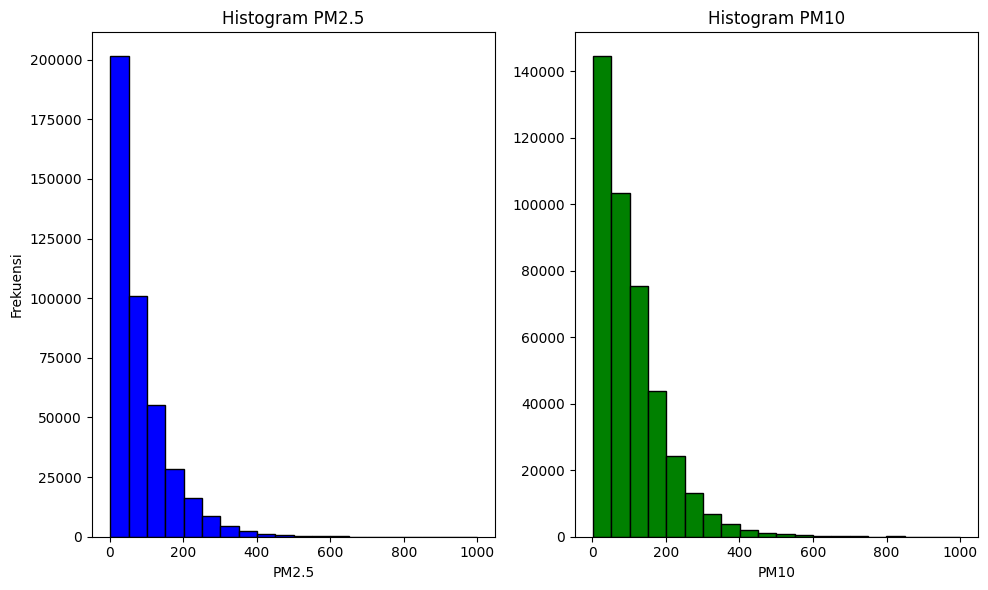

In [10]:
# Plot distribusi polusi udara (PM2.5 dan PM10) dalam histogram
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(merged_data['PM2.5'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')

plt.subplot(1,2,2)
plt.hist(merged_data['PM10'], bins=20, color='green', edgecolor='black')
plt.title('Histogram PM10')
plt.xlabel('PM10')
plt.ylabel

plt.tight_layout()
plt.show()

**Insight:**
- Distribusi PM2.5 dan PM10 cenderung miring ke kanan (right-skewed), artinya sebagian besar pengamatan memiliki nilai rendah, tetapi terdapat periode tertentu dimana nilai PM2.5 dan PM10 sangat tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [11]:
# Membuat kolom datetime
merged_data['datetime'] = pd.to_datetime(merged_data[['year', 'month', 'day', 'hour']])

# Mengatur indeks waktu
merged_data.set_index('datetime', inplace=True)

merged_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


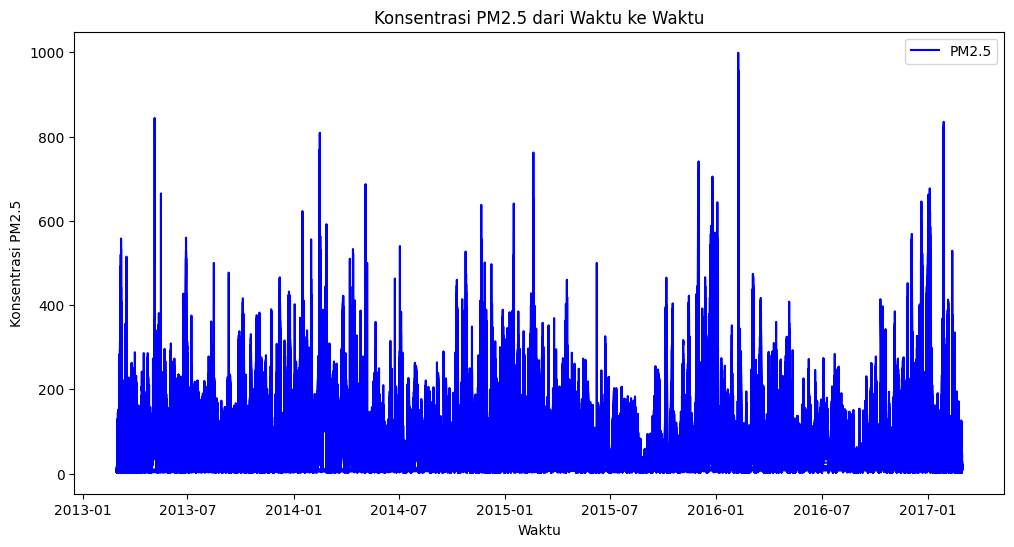

In [12]:
# Plot konsentrasi PM2.5 dari waktu ke waktu
plt.figure(figsize=(12,6))
plt.plot(merged_data.index, merged_data['PM2.5'], color='blue', label='PM2.5')
plt.title('Konsentrasi PM2.5 dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5')
plt.legend()
plt.show()

<ipython-input-13-663a1f83396f>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mean = merged_data['PM2.5'].resample('Y').mean()


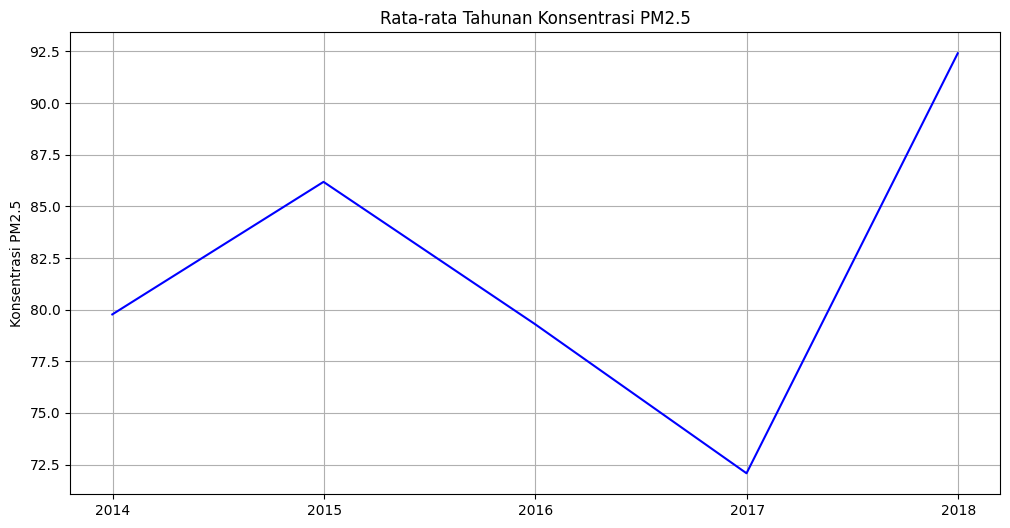

In [13]:
# Resample data ke rata-rata tahunan
yearly_mean = merged_data['PM2.5'].resample('Y').mean()

# Plot rata-rata tahunan PM2.5
plt.figure(figsize=(12,6))
plt.plot(yearly_mean.index, yearly_mean.values, color='blue', label='Rata-rata Tahunan')
plt.title('Rata-rata Tahunan Konsentrasi PM2.5')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

<ipython-input-14-e756839dea26>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = merged_data['PM2.5'].resample('M').mean()


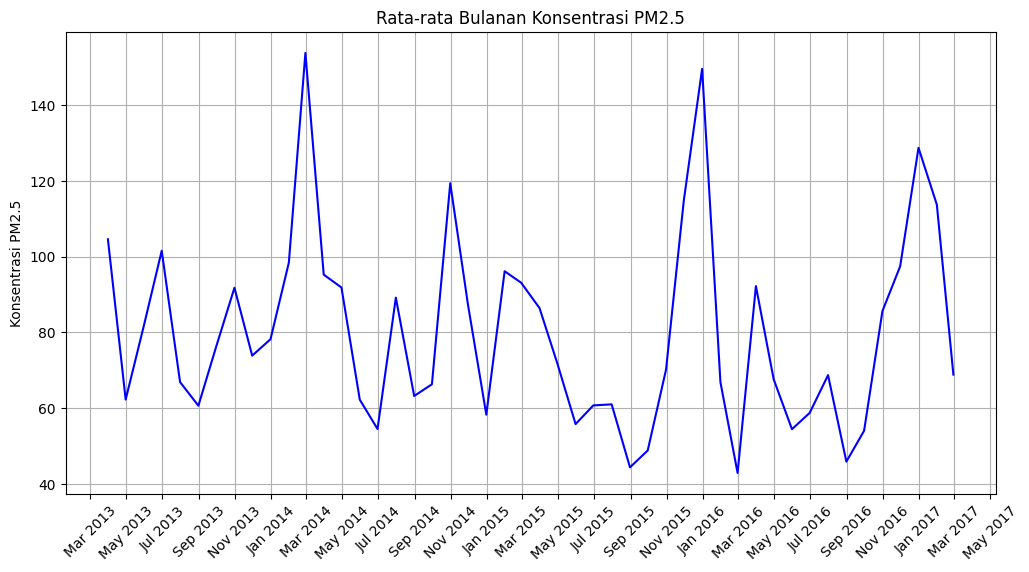

In [14]:
# Resample data ke rata-rata bulanan
monthly_mean = merged_data['PM2.5'].resample('M').mean()

# Plot rata-rata bulanan PM2.5
plt.figure(figsize=(12,6))
plt.plot(monthly_mean.index, monthly_mean.values, color='blue', label='Rata-rata Bulanan')
plt.title('Rata-rata Bulanan Konsentrasi PM2.5')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

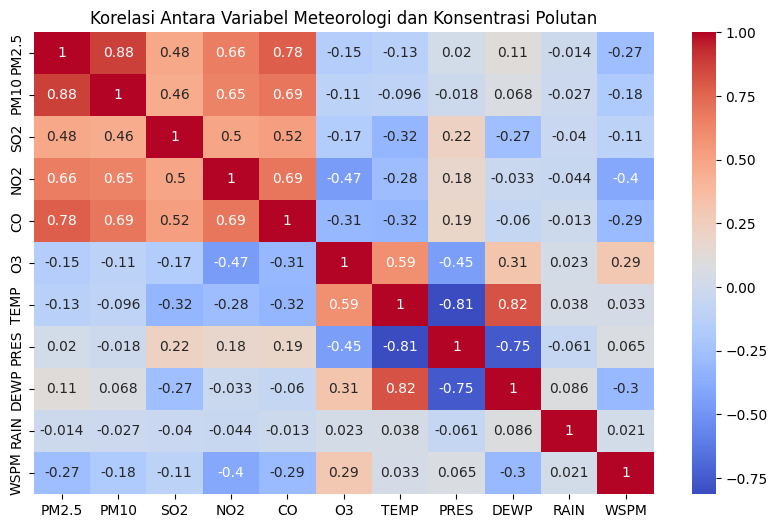

In [15]:
# Korelasi antara variabel meteorologi dengan polutan
numeric_data = merged_data.select_dtypes(include=['float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Variabel Meteorologi dan Konsentrasi Polutan')
plt.show()

**Insight:**
- Terdapat fluktuasi tingkat polusi dari tahun 2013 hingga 2017 dimana tingkat polusi cenderung turun dari tahun 2015 hingga 2017.
- Konsentrasi PM2.5 cenderung tinggi di musim dingin. Hal ini bisa disebabkan karena proses pembakaran untuk pemanas.
- Titik-titik ekstrem konsentrasi PM2.5 bisa berkaitan dengan peristiwa tertentu seperti kebakaran.
- Korelasi positif yang tinggi antara polutan menunjukkan bahwa polutan tersebut sering muncul bersama. Hal ini bisa berkaitan dengan sumber polutan di daerah pengamatan.
- Variabel meteorologi atau cuaca sangat berpengaruh terhadap konsentrasi polutan. Faktor cuaca seperti suhu, kecepatan angin, dan hujan yang mengalami peningkatan akan berdampak pada penurunan konsentrasi polutan.

## Analisis Lanjutan (Opsional)

In [16]:
# Manual Grouping berdasarkan AQI Index

def manual_grouping(pm25):
    if pm25 <= 12:
        return 'Rendah'
    elif pm25 <= 35:
        return 'Sedang'
    elif pm25 <= 55:
        return 'Tidak Sehat Untuk Kelompok Sensitif'
    elif pm25 <= 150:
        return 'Tidak Sehat'
    elif pm25 <= 250:
        return 'Sangat Tidak Sehat'
    else:
        return 'Berbahaya'

merged_data['AQI_Index'] = merged_data['PM2.5'].apply(manual_grouping)

print(merged_data)

                        No  year  month  day  hour  PM2.5  PM10   SO2   NO2  \
datetime                                                                      
2013-03-01 00:00:00      1  2013      3    1     0    4.0   4.0   4.0   7.0   
2013-03-01 01:00:00      2  2013      3    1     1    8.0   8.0   4.0   7.0   
2013-03-01 02:00:00      3  2013      3    1     2    7.0   7.0   5.0  10.0   
2013-03-01 03:00:00      4  2013      3    1     3    6.0   6.0  11.0  11.0   
2013-03-01 04:00:00      5  2013      3    1     4    3.0   3.0  12.0  12.0   
...                    ...   ...    ...  ...   ...    ...   ...   ...   ...   
2017-02-28 19:00:00  35060  2017      2   28    19   11.0  32.0   3.0  24.0   
2017-02-28 20:00:00  35061  2017      2   28    20   13.0  32.0   3.0  41.0   
2017-02-28 21:00:00  35062  2017      2   28    21   14.0  28.0   4.0  38.0   
2017-02-28 22:00:00  35063  2017      2   28    22   12.0  23.0   4.0  30.0   
2017-02-28 23:00:00  35064  2017      2   28    23  

In [17]:
station_mean = merged_data.groupby('station')['PM2.5'].mean().reset_index()
station_mean['AQI_Index'] = station_mean['PM2.5'].apply(manual_grouping)
station_mean.rename(columns={'PM2.5': 'Rata-rata PM2.5'}, inplace=True)

station_mean

,station,Rata-rata PM2.5,AQI_Index
0,Aotizhongxin,82.540623,Tidak Sehat
1,Changping,70.986438,Tidak Sehat
2,Dingling,66.845557,Tidak Sehat
3,Dongsi,86.144243,Tidak Sehat
4,Guanyuan,82.897522,Tidak Sehat
5,Gucheng,84.074802,Tidak Sehat
6,Huairou,69.501747,Tidak Sehat
7,Nongzhanguan,85.079472,Tidak Sehat
8,Shunyi,79.437962,Tidak Sehat
9,Tiantan,82.033097,Tidak Sehat


## Conclusion

- Tingkat polusi dari tahun 2013 hingga 2017 cenderung menurun. Hal ini menunjukkan adanya upaya pengendalian polusi udara selama periode tersebut.
- Faktor meteorologi atau cuaca sangat berpengaruh terhadap tingkat polusi udara di suatu daerah.
- Berdasarkan indeks kualitas udara, daerah-daerah di sekitar 12 stasiun pengamatan dikategorikan tidak sehat.